## data load

In [14]:
import pandas as pd
import numpy as np


train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_time_df = train_df['TIMESTAMP']
test_time_df = test_df['TIMESTAMP']

def split_TIMESTEPS(train_df, test_df, train_time_df, test_time_df):

    train_col_year = []
    train_col_month = []
    train_col_day = []

    test_col_year = []
    test_col_month = []
    test_col_day = []


    # split : year, month, day

    for i in range(len(train_time_df)):
        time_df_i = train_time_df[i]    
        year = time_df_i[:4]
        train_col_year.append(year)
        train_col_year = list(map(int,train_col_year))
        
        month = time_df_i[5:7]
        train_col_month.append(month)
        train_col_month = list(map(int,train_col_month))

        day = time_df_i[8:10]
        train_col_day.append(day)
        train_col_day = list(map(int,train_col_day))

    for i in range(len(test_time_df)):
        time_df_i = test_time_df[i]    
        year = time_df_i[:4]
        test_col_year.append(year)
        test_col_year = list(map(int,test_col_year))

        month = time_df_i[5:7]
        test_col_month.append(month)
        test_col_month = list(map(int,test_col_month))

        day = time_df_i[8:10]
        test_col_day.append(day)
        test_col_day = list(map(int,test_col_day))

        # 
    train_df['year'] = train_col_year
    train_df['month'] = train_col_month
    train_df['day'] = train_col_day

    test_df['year'] = test_col_year
    test_df['month'] = test_col_month
    test_df['day'] = test_col_day

split_TIMESTEPS(train_df, test_df, train_time_df, test_time_df)

## 2️⃣ Preproccesing

In [15]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

### 1)_LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_df[i])
    train_df[i] = le.transform(train_df[i])
    
    for label in np.unique(test_df[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_df[i] = le.transform(test_df[i]) 

print('Done.')

Done.


### 2)_OneHotEncorder

In [17]:
train_df_oh = pd.concat([train_df, pd.get_dummies(train_df['Y_Class'])], axis=1)

train_df_oh_group = train_df_oh[['Y_Class','LINE','PRODUCT_CODE',0,1,2,'year','month','day']]

### 3)_Drop

In [25]:
#train_x = train_df.drop(columns=['PRODUCT_ID', 'Y_Class', 'TIMESTAMP'])
train_x = train_df_oh.drop(columns=['Y_Class', 'PRODUCT_ID', 'TIMESTAMP', 'Y_Quality', 0, 1, 2])
train_y = train_df_oh['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## 2️⃣ EDA

In [72]:
train_x.columns

Index(['Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5',
       'X_6', 'X_7',
       ...
       'X_2869', 'X_2870', 'X_2871', 'X_2872', 'X_2873', 'X_2874', 'X_2875',
       'year', 'month', 'day'],
      dtype='object', length=2881)

### 1)_value_counts

#### _(1)  year, month, day

In [52]:
for i in ['year', 'month','day']:
    print('### {} ###'.format(i), '\n')
    print(train_df[i].value_counts(), '\n\n\n')

### year ### 

2022    598
Name: year, dtype: int64 



### month ### 

7    244
8    237
6     79
9     38
Name: month, dtype: int64 



### day ### 

3     33
22    32
13    32
5     28
14    28
21    28
31    27
25    26
23    23
7     23
11    22
24    21
19    20
16    18
12    18
26    18
1     18
29    18
8     18
4     17
17    16
20    15
6     15
15    14
9     12
10    12
30    12
2     11
18    11
28    10
27     2
Name: day, dtype: int64 





#### _(2)  Y Class

In [55]:
print('### Y_Class ###'.format(i), '\n')
print(train_df['Y_Class'].value_counts(), '\n\n\n')

### Y_Class ### 

1    407
2    103
0     88
Name: Y_Class, dtype: int64 





#### _(3)  PRODUCT CODE

In [71]:
print('### PRODUCT_CODE ###'.format(i), '\n')
train_x['PRODUCT_CODE'].value_counts()

### PRODUCT_CODE ### 



2    343
0    249
1      6
Name: PRODUCT_CODE, dtype: int64

#### _(4)  Y Quality

In [73]:
print('### Y_Quality ###'.format(i), '\n')
train_x['Y_Quality'].value_counts()

### Y_Quality ### 



0.534737    3
0.530413    2
0.526997    2
0.529952    2
0.532405    2
           ..
0.547592    1
0.536275    1
0.527200    1
0.528319    1
0.533702    1
Name: Y_Quality, Length: 583, dtype: int64

### 2)_Groupby

#### _(1)  Y Class / Y Quality

In [77]:
class_quality = train_df.groupby('Y_Class').Y_Quality.mean()
print(class_quality)

Y_Class
0    0.520837
1    0.530253
2    0.542031
Name: Y_Quality, dtype: float64


#### _(2)  Y Class / year, month, day

In [41]:
print('### month ###')
train_month = train_df_oh_group.groupby(['month'])
y_class_month_sum = train_month[0,1,2].sum()
print(y_class_month_sum, '\n\n\n')

print('### day ###')
train_day = train_df_oh_group.groupby(['day'])
y_class_day_sum = train_day[0,1,2].sum()
print(y_class_day_sum)

### month ###
        0    1   2
month             
6       8   46  25
7      27  168  49
8      40  174  23
9      13   19   6 



### day ###
      0   1   2
day            
1     6   7   5
2     2   7   2
3     4  21   8
4     3  11   3
5    14  13   1
6     4  10   1
7     4  19   0
8     3  15   0
9     2  10   0
10    3   8   1
11    1  19   2
12    0  14   4
13    0  22  10
14    4  21   3
15    1  13   0
16    3  11   4
17    2  13   1
18    0   9   2
19    2  13   5
20    1   8   6
21    2  23   3
22    1  23   8
23    1  21   1
24    2   9  10
25    9  15   2
26    6  10   2
27    0   2   0
28    1   6   3
29    1  11   6
30    1   7   4
31    5  16   6


/var/folders/w4/fbwcp4j13tldxpsj0dtj__7r0000gn/T/ipykernel_26773/2750959305.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_class_month_sum = train_month[0,1,2].sum()
/var/folders/w4/fbwcp4j13tldxpsj0dtj__7r0000gn/T/ipykernel_26773/2750959305.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_class_day_sum = train_day[0,1,2].sum()


In [103]:
y_day = pd.DataFrame(y_class_day_sum.values, columns=[0, 1, 2])

sum_012 = []
p_0 = []
p_1 = []
p_2 = []

for i in range(len(y_day.index)):
    sum_012.append(y_day.loc[i, :].sum())
    p_0.append(y_day.loc[i, 0] / sum_012[i])
    p_1.append(y_day.loc[i, 1] / sum_012[i])
    p_2.append(y_day.loc[i, 2] / sum_012[i])

y_day['p0'] = p_0
y_day['p1'] = p_1
y_day['p2'] = p_2


In [116]:
print('### day_p1 ###')
print(y_day['p1'][y_day['p1'] > 0.8], '\n\n')

### day_p1 ###
6     0.826087
7     0.833333
8     0.833333
10    0.863636
14    0.928571
16    0.812500
17    0.818182
20    0.821429
22    0.913043
26    1.000000
Name: p1, dtype: float64 




### 3)_Grouped bar

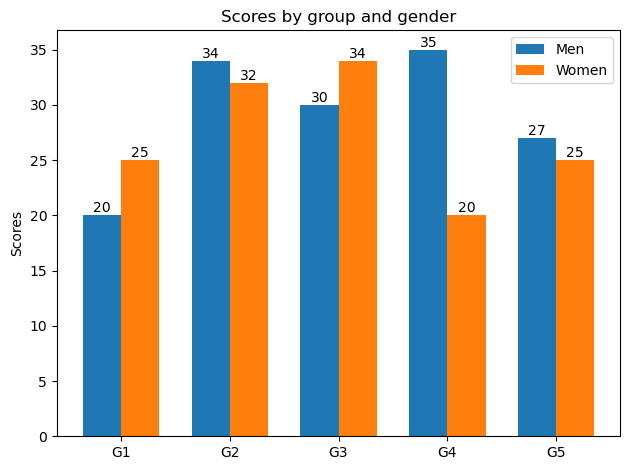

In [90]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)

fig.tight_layout()

plt.show()

In [ ]:



labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)

fig.tight_layout()

plt.show()